In [1]:
library(tidyverse)
library(lubridate)
library(nycflights13)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




### 날짜 / 시간 생성
- 데이트(date)형 : 날짜 \<date>
- 타임(time)형 : 시간 \<time>
- 데이트-타임(date-time)형 : 날짜 더하기 시간 \<dttm>

### today() : 오늘 날짜
### now()  : 현재 시간

In [4]:
today() ; now()

[1] "2022-04-04"

[1] "2022-04-04 10:21:59 KST"

### 문자열에서 생성
- "y", "m", "d", "h", "m","s"를 순서대로 배치

In [6]:
ymd("2022-04-04")
mdy("April 4th, 2022")
dmy("04-Apr-2022")
ymd(20220404)

[1] "2022-04-04"

[1] "2022-04-04"

[1] "2022-04-04"

[1] "2022-04-04"

In [8]:
ymd_hms("2022-04-04 10:25:59")
mdy_hm("04/04/22 10:25")

[1] "2022-04-04 10:25:59 UTC"

[1] "2022-04-04 10:25:00 UTC"

In [9]:
ymd(20220404, tz = "UTC")

[1] "2022-04-04 UTC"

### 개별 구성요소에서 생성

In [10]:
flights %>% 
    select(year, month, day, hour, minute) %>% print

# A tibble: 336,776 x 5
    year month   day  hour minute
   <int> <int> <int> <dbl>  <dbl>
 1  2013     1     1     5     15
 2  2013     1     1     5     29
 3  2013     1     1     5     40
 4  2013     1     1     5     45
 5  2013     1     1     6      0
 6  2013     1     1     5     58
 7  2013     1     1     6      0
 8  2013     1     1     6      0
 9  2013     1     1     6      0
10  2013     1     1     6      0
# ... with 336,766 more rows


### make_date() : 데이트형 생성
### make_datetime() : 데이트-타임형 생성

In [13]:
flights %>% select(year, month, day, hour, minute) %>% 
    mutate(departure = make_datetime(year, month, day, hour, minute)) %>% print

# A tibble: 336,776 x 6
    year month   day  hour minute departure          
   <int> <int> <int> <dbl>  <dbl> <dttm>             
 1  2013     1     1     5     15 2013-01-01 05:15:00
 2  2013     1     1     5     29 2013-01-01 05:29:00
 3  2013     1     1     5     40 2013-01-01 05:40:00
 4  2013     1     1     5     45 2013-01-01 05:45:00
 5  2013     1     1     6      0 2013-01-01 06:00:00
 6  2013     1     1     5     58 2013-01-01 05:58:00
 7  2013     1     1     6      0 2013-01-01 06:00:00
 8  2013     1     1     6      0 2013-01-01 06:00:00
 9  2013     1     1     6      0 2013-01-01 06:00:00
10  2013     1     1     6      0 2013-01-01 06:00:00
# ... with 336,766 more rows


In [14]:
make_datetime_100 <- function(year, month, day, time) {
    make_datetime(year, month, day, time %/% 100, time %% 100)
}

flights_dt <- flights %>% 
    filter(!is.na(dep_time), !is.na(arr_time)) %>%
    mutate(
        dep_time = make_datetime_100(year, month, day, dep_time),
        arr_time = make_datetime_100(year, month, day, arr_time),
        sched_dep_time = make_datetime_100(year, month, day, sched_dep_time),
        sched_arr_time = make_datetime_100(year, month, day, sched_arr_time)
    ) %>%
    select(origin, dest, ends_with("delay"), ends_with("time"))

In [17]:
flights_dt %>% head

origin,dest,dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time
<chr>,<chr>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<dttm>,<dbl>
EWR,IAH,2,11,2013-01-01 05:17:00,2013-01-01 05:15:00,2013-01-01 08:30:00,2013-01-01 08:19:00,227
LGA,IAH,4,20,2013-01-01 05:33:00,2013-01-01 05:29:00,2013-01-01 08:50:00,2013-01-01 08:30:00,227
JFK,MIA,2,33,2013-01-01 05:42:00,2013-01-01 05:40:00,2013-01-01 09:23:00,2013-01-01 08:50:00,160
JFK,BQN,-1,-18,2013-01-01 05:44:00,2013-01-01 05:45:00,2013-01-01 10:04:00,2013-01-01 10:22:00,183
LGA,ATL,-6,-25,2013-01-01 05:54:00,2013-01-01 06:00:00,2013-01-01 08:12:00,2013-01-01 08:37:00,116
EWR,ORD,-4,12,2013-01-01 05:54:00,2013-01-01 05:58:00,2013-01-01 07:40:00,2013-01-01 07:28:00,150


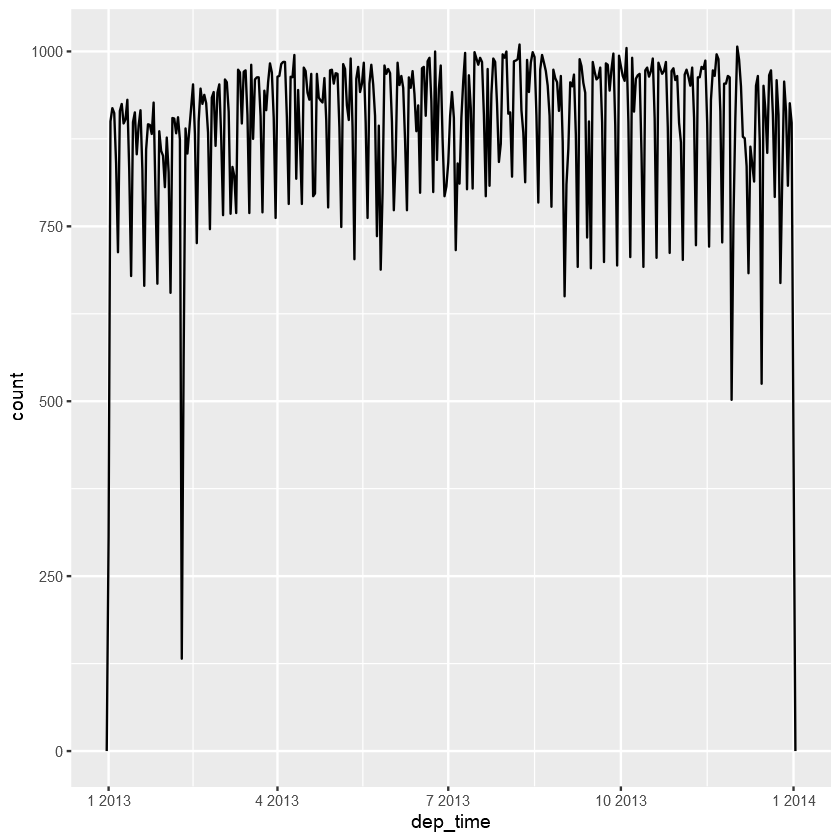

In [23]:
flights_dt %>% 
    ggplot(aes(dep_time)) + geom_freqpoly(binwidth = 86400) # 86400초 = 1일

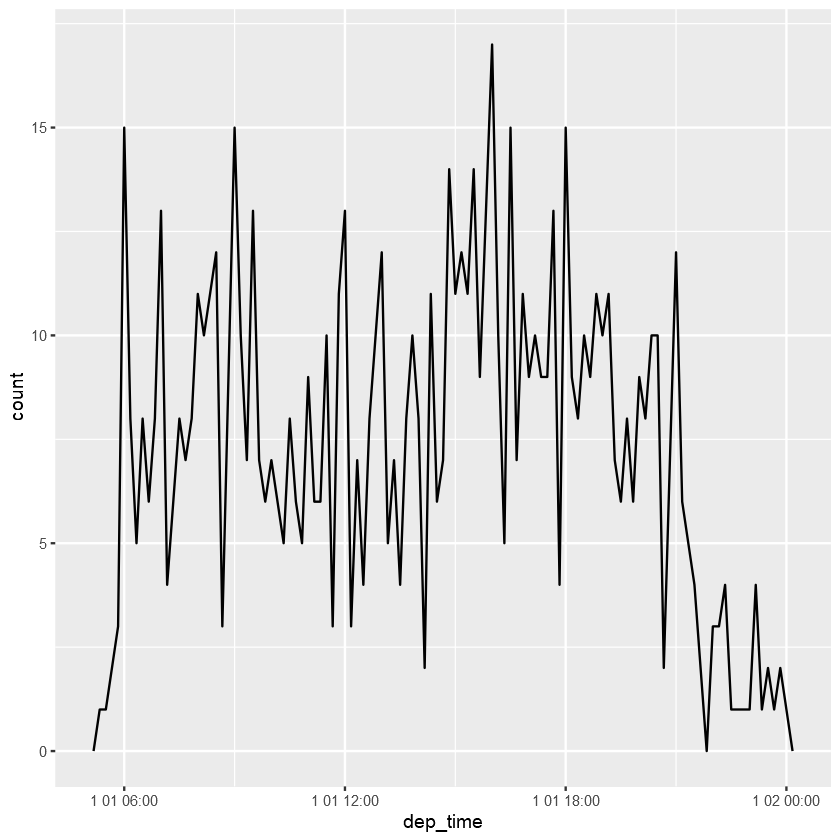

In [25]:
flights_dt %>% 
    filter(dep_time < ymd(20130102)) %>%
    ggplot(aes(dep_time)) + geom_freqpoly(binwidth = 600) # 600초 = 10분

### 기타 유형에서 생성

In [27]:
as_datetime(today())
as_date(now())

[1] "2022-04-04 UTC"

[1] "2022-04-04"

In [28]:
as_datetime(60 * 60 * 10)
as_date(365 * 10 + 2)

[1] "1970-01-01 10:00:00 UTC"

[1] "1980-01-01"

In [29]:
# 13.2.4
# 3 
d1 <- "January 1, 2010"
d2 <- "2015-Mar-07"
d3 <- "06-Jun-2017"
d4 <- c("August 19 (2015)", "July 1 (2015)")
d5 <- "12/30/14"

In [30]:
mdy(d1) ; ymd(d2) ; dmy(d3) ; mdy(d4) ; mdy(d5)

[1] "2010-01-20"

[1] "2015-03-07"

[1] "2017-06-06"

[1] "2015-01-09" "2015-01-20"

[1] "2014-12-30"

### 데이트-타임형 구성요소

### 데이트형의 개별 부분 불러오기
- year(), month()
- mday() : 한 달에서 일
- yday() : 한 해에서 일
- wday() : 한 주에서 일
- hour(), minute(), second()

In [33]:
datetime <- ymd_hms("2022-04-04 10:40:30")
year(datetime)
month(datetime)
mday(datetime)
yday(datetime)
wday(datetime)

[1] 2022

[1] 4

[1] 4

[1] 94

[1] 2

In [36]:
print(month(datetime, label = T)) # 약식 이릅 반환

[1] 4
Levels: 1 < 2 < 3 < 4 < 5 < 6 < 7 < 8 < 9 < 10 < 11 < 12


In [40]:
print(wday(datetime, label = T, abbr = F)) # 전체 이름 반환

[1] 월요일
Levels: 일요일 < 월요일 < 화요일 < 수요일 < 목요일 < 금요일 < 토요일


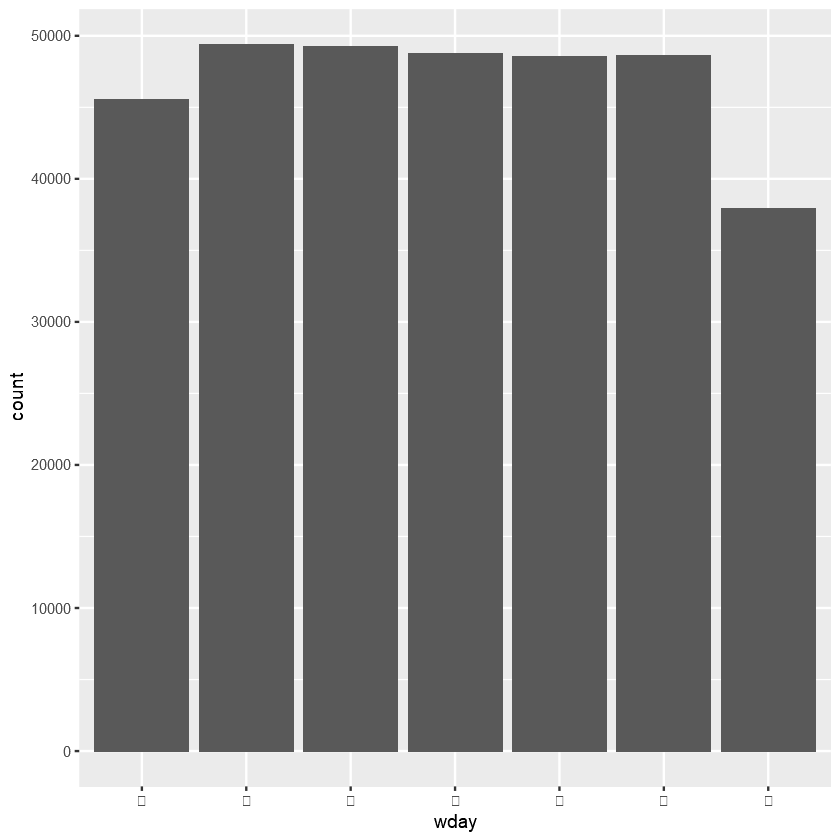

In [41]:
flights_dt %>% mutate(wday = wday(dep_time, label = T)) %>%
    ggplot(aes(wday)) + geom_bar()

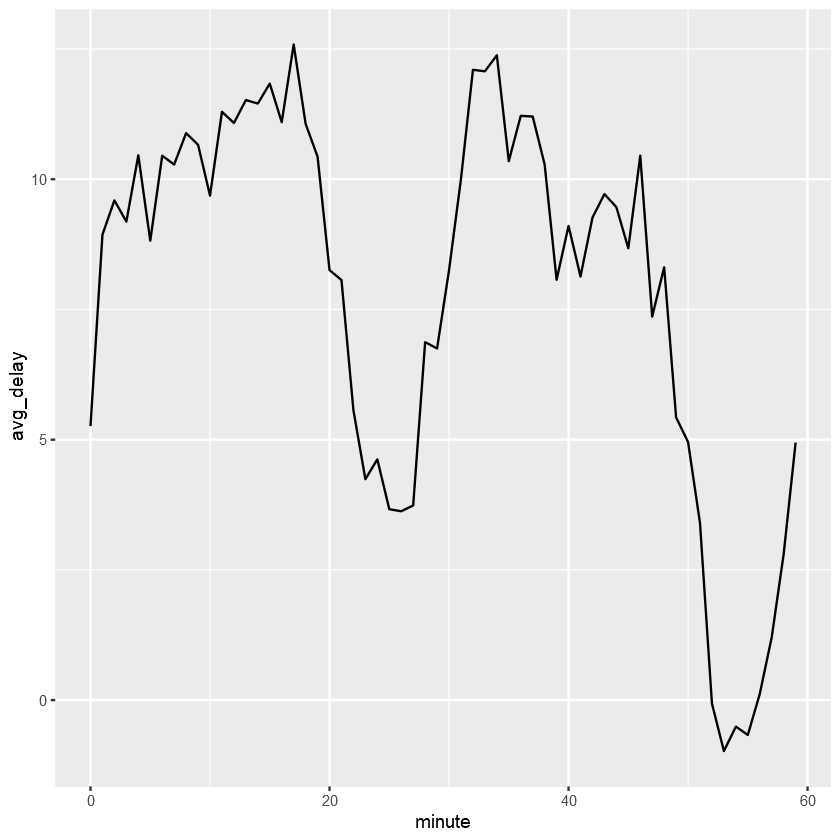

In [48]:
flights_dt %>%
    mutate(minute = minute(dep_time)) %>%
    group_by(minute) %>%
    summarize(
        avg_delay = mean(arr_delay, na.rm = T),
        n = n()) %>%
    ggplot(aes(minute, avg_delay)) + geom_line() 

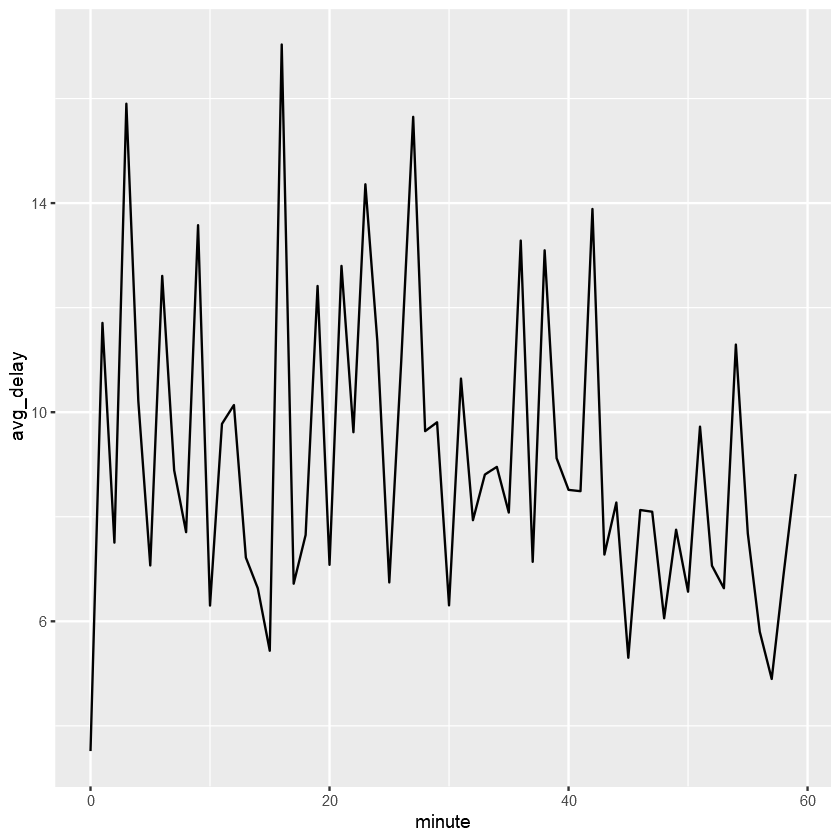

In [47]:
sched_dep <- flights_dt %>%
    mutate(minute = minute(sched_dep_time)) %>%
    group_by(minute) %>%
    summarize(
        avg_delay = mean(arr_delay, na.rm = T),
        n = n())
ggplot(sched_dep, aes(minute, avg_delay)) + geom_line()

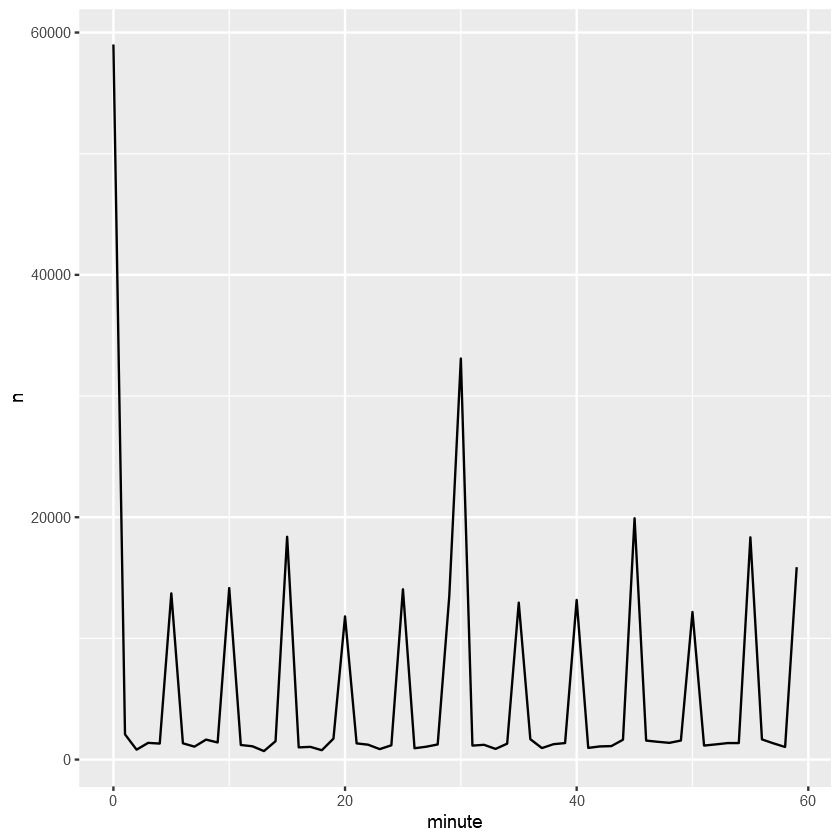

In [49]:
ggplot(sched_dep, aes(minute, n)) + geom_line()

### 반올림
### floor_date()
### round_date()
### ceiling_date()

- "week" : 주단위

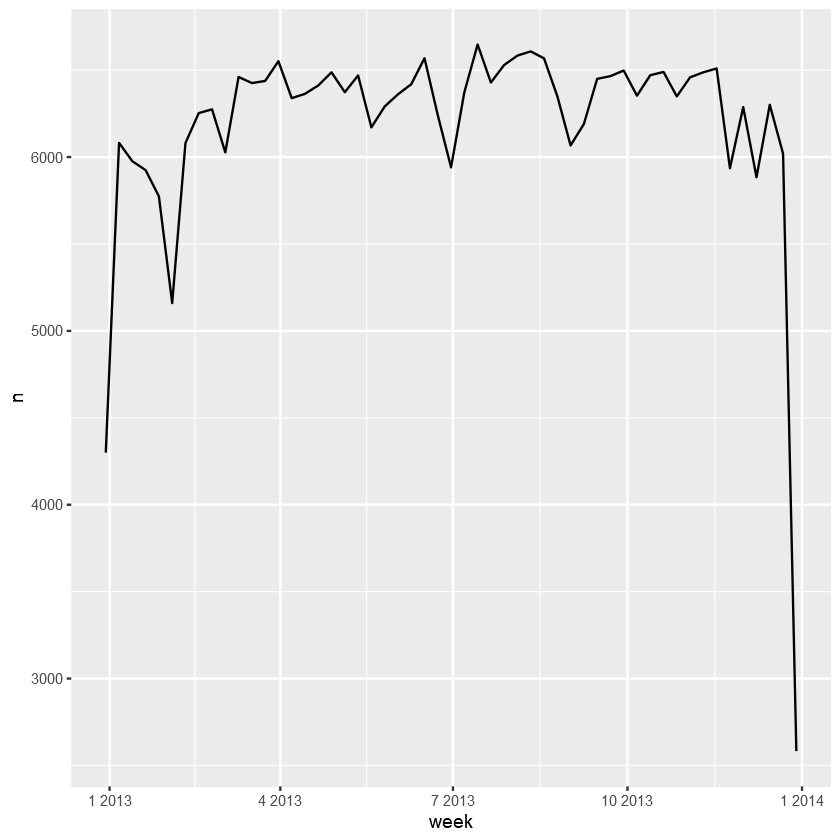

In [53]:
flights_dt %>%
    count(week = floor_date(dep_time, "week")) %>%
    ggplot(aes(week, n)) + geom_line()

### 구성요소 설정

In [56]:
(datetime <- ymd_hms("2022-04-04 10:51:56")) 

[1] "2022-04-04 10:51:56 UTC"

In [63]:
year(datetime) <- 2021
month(datetime) <- 11
mday(datetime) <- 24
hour(datetime) <- 22
minute(datetime) <- 20
second(datetime) <- 30
datetime

[1] "2021-11-24 22:20:30 UTC"

### update() : 새로운 데이트-타임형 생성
- 값이 너무 큰 경우에는 이월

In [64]:
update(datetime, year = 2016, month = 3, mday = 21, hour = 14)

[1] "2016-03-21 14:20:30 UTC"

In [66]:
ymd("2016-03-21") %>% update(mday = 60)
ymd("2016-03-21") %>% update(hour = 72)

[1] "2016-04-29"

[1] "2016-03-24"

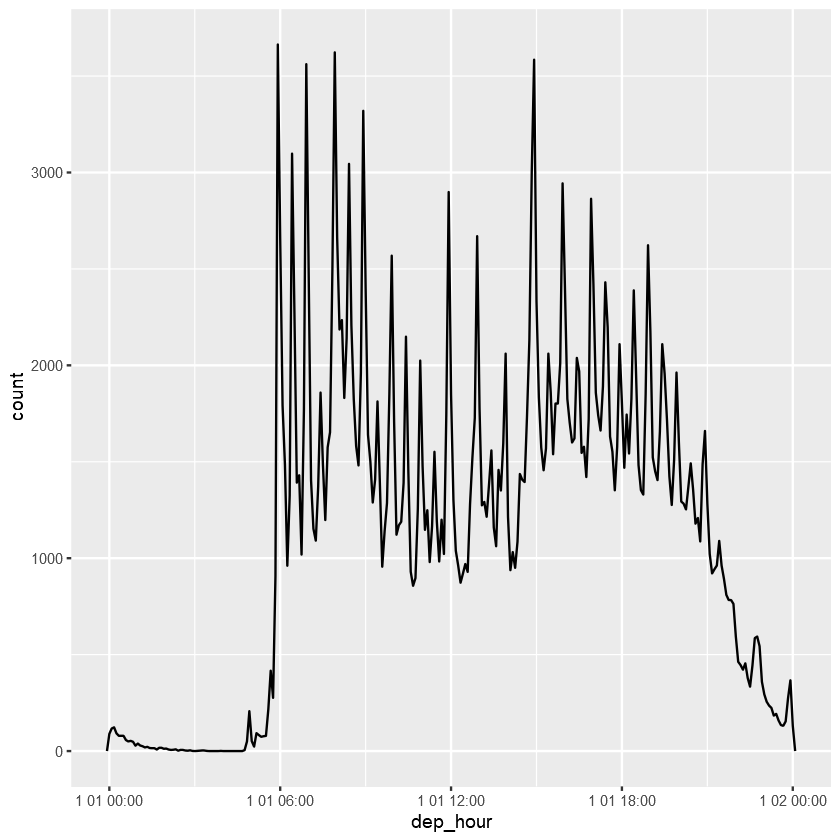

In [73]:
flights_dt %>%
    mutate(dep_hour = update(dep_time, yday = 1)) %>%
    ggplot(aes(dep_hour)) + geom_freqpoly(binwidth = 300)

In [76]:
# 13.3.4
sched_dep <- flights_dt %>%
  mutate(minute = minute(sched_dep_time)) %>%
  group_by(minute) %>%
  summarise(
    avg_delay = mean(arr_delay, na.rm = TRUE),
    n = n()
  )

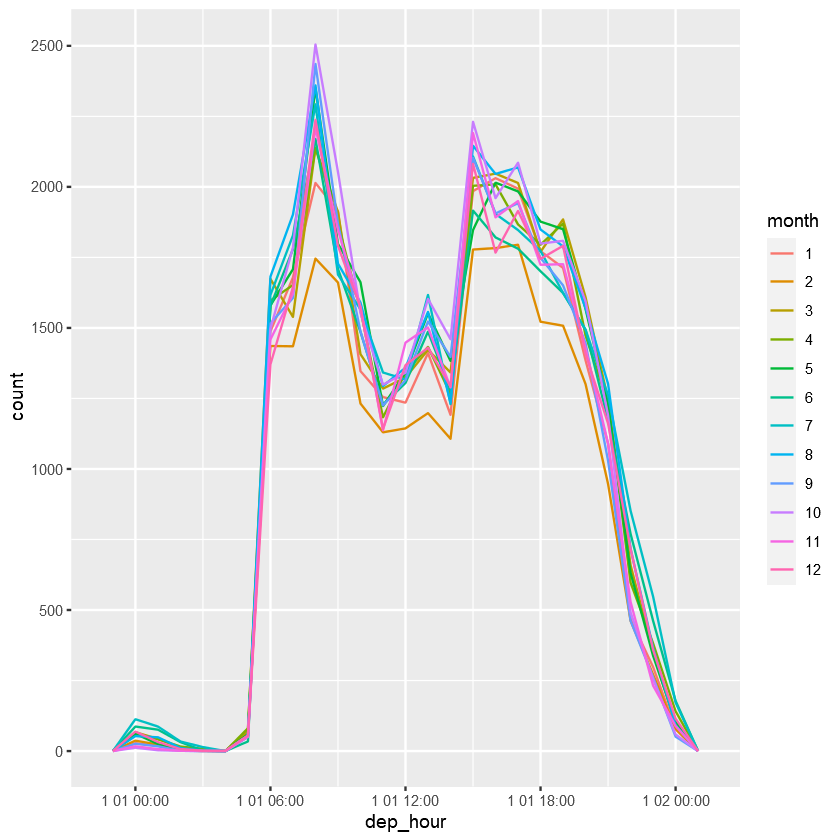

In [77]:
# 1
flights_dt %>%
  filter(!is.na(dep_time)) %>%
  mutate(dep_hour = update(dep_time, yday = 1)) %>%
  mutate(month = factor(month(dep_time))) %>%
  ggplot(aes(dep_hour, color = month)) +
  geom_freqpoly(binwidth = 60 * 60)

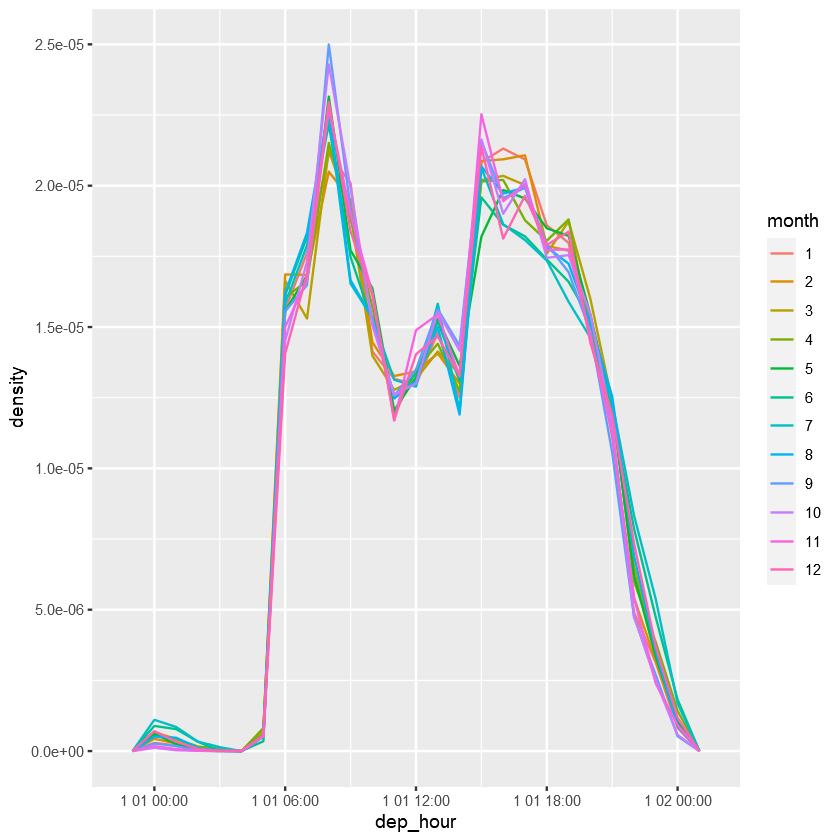

In [78]:
flights_dt %>%
  filter(!is.na(dep_time)) %>%
  mutate(dep_hour = update(dep_time, yday = 1)) %>%
  mutate(month = factor(month(dep_time))) %>%
  ggplot(aes(dep_hour, color = month)) +
  geom_freqpoly(aes(y = ..density..), binwidth = 60 * 60)

In [82]:
# 2
flights %>% select(dep_time, sched_dep_time, dep_delay) %>% head

dep_time,sched_dep_time,dep_delay
<int>,<int>,<dbl>
517,515,2
533,529,4
542,540,2
544,545,-1
554,600,-6
554,558,-4


In [83]:
flights_dt %>%
  mutate(dep_time_ = sched_dep_time + dep_delay * 60) %>%
  filter(dep_time_ != dep_time) %>%
  select(dep_time_, dep_time, sched_dep_time, dep_delay) %>% head

dep_time_,dep_time,sched_dep_time,dep_delay
<dttm>,<dttm>,<dttm>,<dbl>
2013-01-02 08:48:00,2013-01-01 08:48:00,2013-01-01 18:35:00,853
2013-01-03 00:42:00,2013-01-02 00:42:00,2013-01-02 23:59:00,43
2013-01-03 01:26:00,2013-01-02 01:26:00,2013-01-02 22:50:00,156
2013-01-04 00:32:00,2013-01-03 00:32:00,2013-01-03 23:59:00,33
2013-01-04 00:50:00,2013-01-03 00:50:00,2013-01-03 21:45:00,185
2013-01-04 02:35:00,2013-01-03 02:35:00,2013-01-03 23:59:00,156


In [89]:
# 3
flights_dt %>%
  mutate(
    flight_duration = as.numeric(arr_time - dep_time),
    air_time_mins = air_time,
    diff = flight_duration - air_time_mins
  ) %>%
  select(origin, dest, flight_duration, air_time_mins, diff) %>% head

origin,dest,flight_duration,air_time_mins,diff
<chr>,<chr>,<dbl>,<dbl>,<dbl>
EWR,IAH,193,227,-34
LGA,IAH,197,227,-30
JFK,MIA,221,160,61
JFK,BQN,260,183,77
LGA,ATL,138,116,22
EWR,ORD,106,150,-44


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



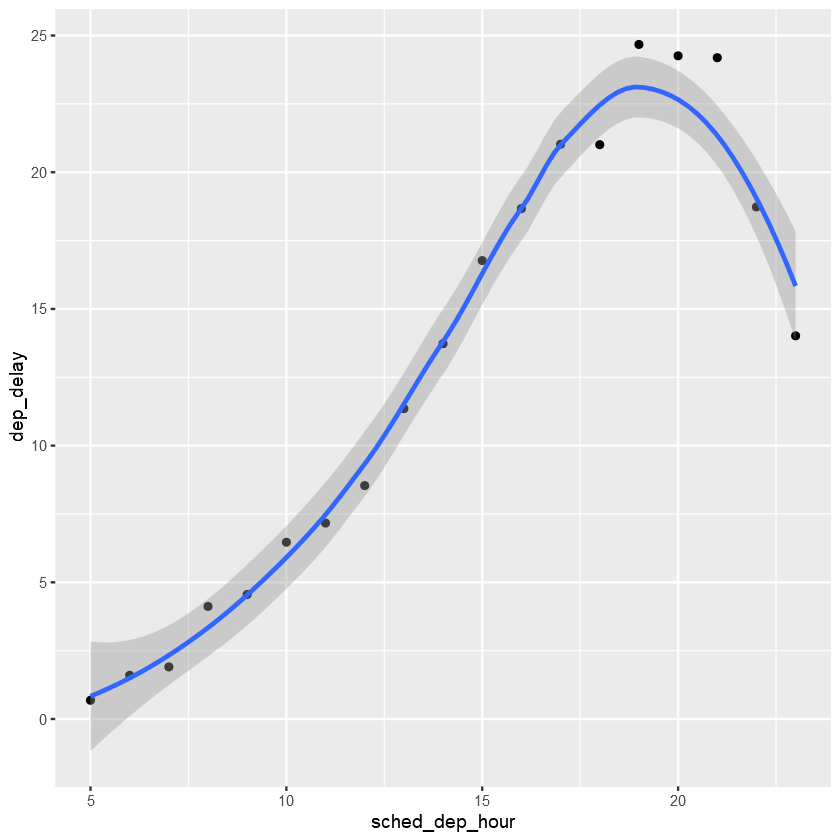

In [92]:
# 4
flights_dt %>%
  mutate(sched_dep_hour = hour(sched_dep_time)) %>%
  group_by(sched_dep_hour) %>%
  summarise(dep_delay = mean(dep_delay)) %>%
  ggplot(aes(y = dep_delay, x = sched_dep_hour)) +
  geom_point() +
  geom_smooth()

In [111]:
# 5 
# 요일별 출발/도착 지연 시간
delay_wday <- flights_dt %>%
              mutate(dow = wday(sched_dep_time)) %>%
              group_by(dow) %>%
              summarise(
                dep_delay = mean(dep_delay),
                arr_delay = mean(arr_delay, na.rm = TRUE)
              ) %>% print

# A tibble: 7 x 3
    dow dep_delay arr_delay
  <dbl>     <dbl>     <dbl>
1     1     11.5       4.82
2     2     14.7       9.65
3     3     10.6       5.39
4     4     11.7       7.05
5     5     16.1      11.7 
6     6     14.7       9.07
7     7      7.62     -1.45


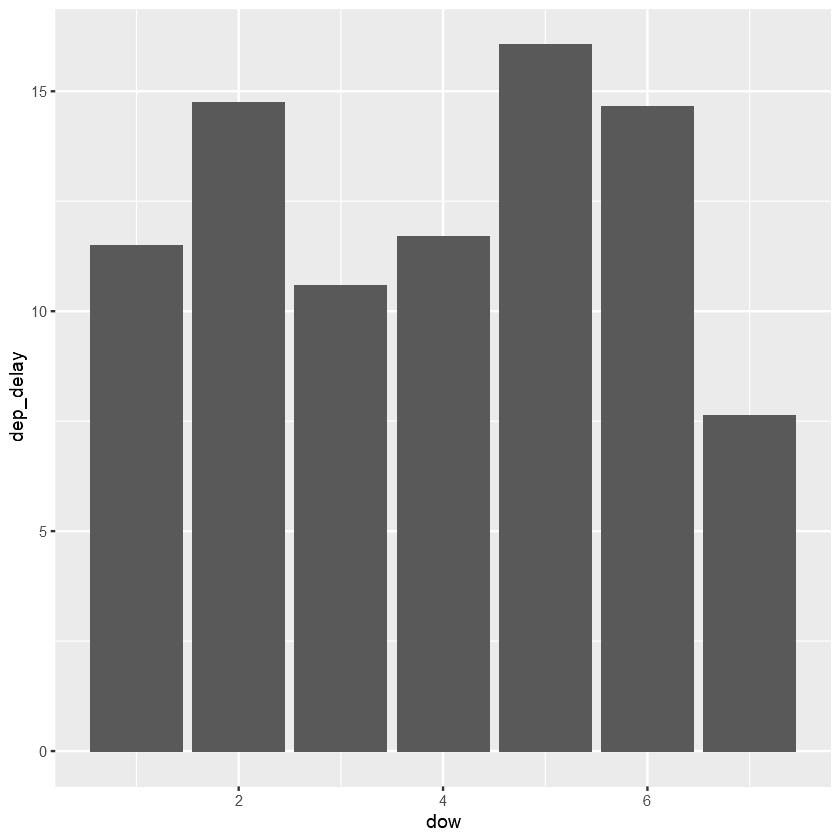

In [113]:
ggplot(delay_wday) + geom_bar(aes(dow, dep_delay), stat= "identity")

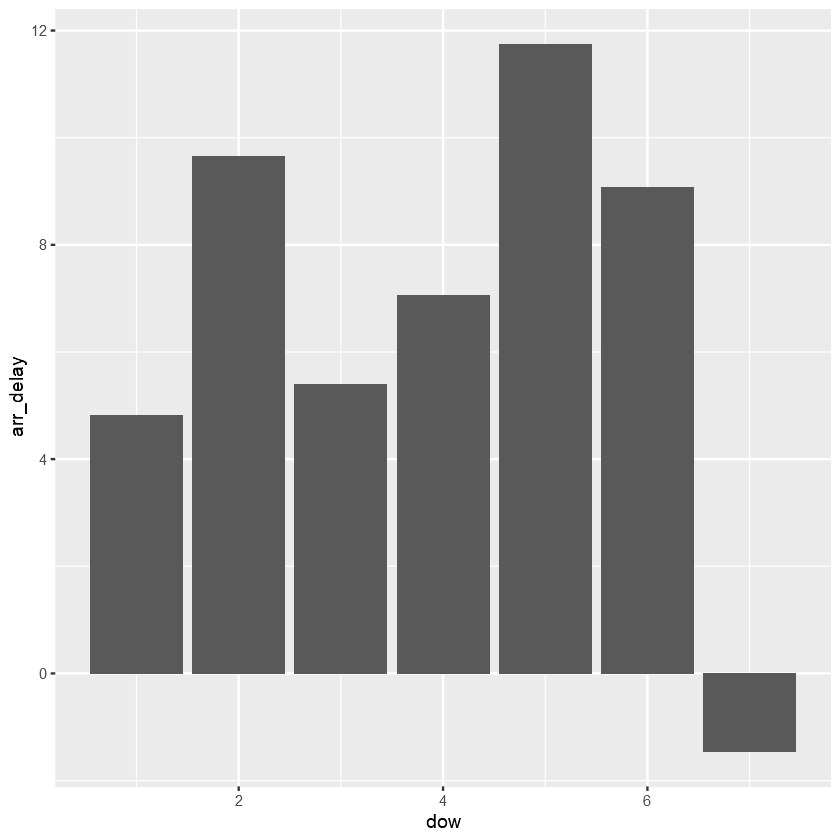

In [114]:
ggplot(delay_wday) + geom_bar(aes(dow, arr_delay), stat= "identity")

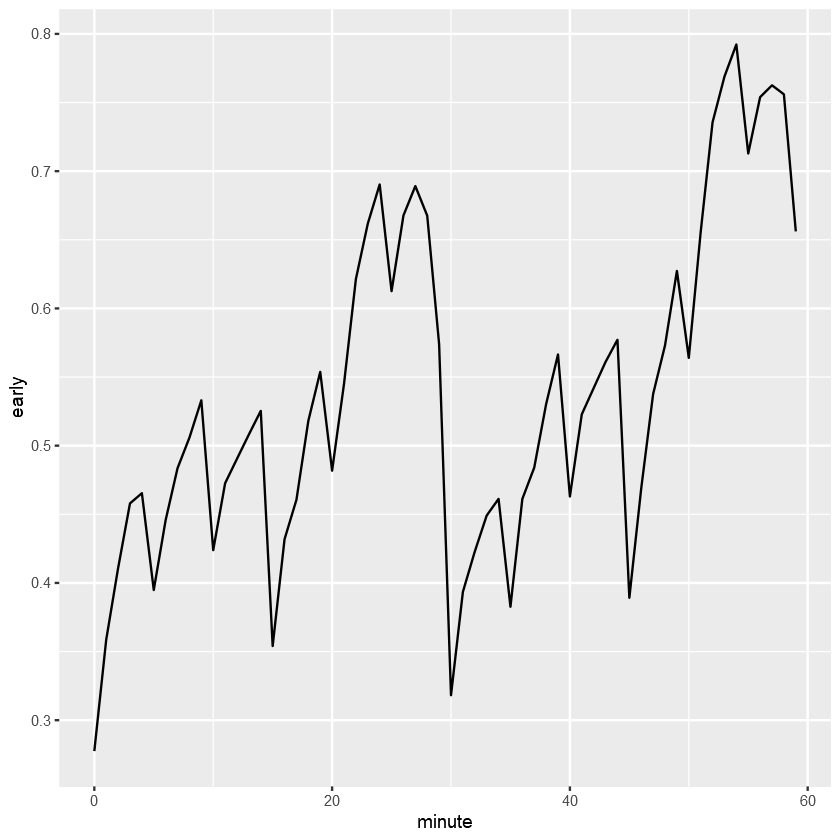

In [119]:
# 7
flights_dt %>% 
  mutate(minute = minute(dep_time),
         early = dep_delay < 0) %>% 
  group_by(minute) %>% 
  summarise(
    early = mean(early, na.rm = TRUE),
    n = n()) %>% 
  ggplot(aes(minute, early)) + geom_line()

### 시간 범위

### difftime형

In [121]:
(h_age <- today() - ymd(19961124))

Time difference of 9262 days

### 듀레이션형(duration) : 정확한 초를 나타냄
- dseconds()
- dminutes()
- dhours()
- ddays()
- dweeks()
- dyears()

In [122]:
as.duration(h_age)

[1] "800236800s (~25.36 years)"

In [125]:
dseconds(15)
dminutes(10)
dhours(c(12, 24))
ddays(0:5)
dweeks(3)
dyears(1)

[1] "15s"

[1] "600s (~10 minutes)"

[1] "43200s (~12 hours)" "86400s (~1 days)"

[1] "0s"                "86400s (~1 days)"  "172800s (~2 days)"
[4] "259200s (~3 days)" "345600s (~4 days)" "432000s (~5 days)"

[1] "1814400s (~3 weeks)"

[1] "31557600s (~1 years)"

In [126]:
2 * dyears(1) 
dyears(1) + dweeks(12) + dhours(15)

[1] "63115200s (~2 years)"

[1] "38869200s (~1.23 years)"

In [127]:
(tomorrow <- today() + ddays(1))
(last_year <- today() - dyears(1))

[1] "2022-04-05"

[1] "2021-04-03 18:00:00 UTC"

### 피리어드형(period) : 주와 월과 같은 사람의 단위를 나타냄
- seconds()
- minutes()
- hours()
- days()
- months()
- weeks()
- years()

In [129]:
seconds(15)
minutes(10)
hours(c(12, 24))
days(7)
months(1:6)
weeks(3)
years(1)

[1] "15S"

[1] "10M 0S"

[1] "12H 0M 0S" "24H 0M 0S"

[1] "7d 0H 0M 0S"

[1] "1m 0d 0H 0M 0S" "2m 0d 0H 0M 0S" "3m 0d 0H 0M 0S" "4m 0d 0H 0M 0S"
[5] "5m 0d 0H 0M 0S" "6m 0d 0H 0M 0S"

[1] "21d 0H 0M 0S"

[1] "1y 0m 0d 0H 0M 0S"

In [130]:
10 * (months(6) + days(1))
days(50) + hours(25) + minutes(2)

[1] "60m 10d 0H 0M 0S"

[1] "50d 25H 2M 0S"

In [144]:
flights_dt <- flights %>% filter(arr_time < dep_time)

In [145]:
flights_dt <- flights_dt %>%
    mutate(
        overnight = arr_time < dep_time,
        arr_time = arr_time + days(overnight * 1),
        sched_arr_time = sched_arr_time + days(overnight * 1)
    )
flights_dt %>% head

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,overnight
<int>,<int>,<int>,<int>,<int>,<dbl>,<Period>,<Period>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<lgl>
2013,1,1,1929,1920,9,1d 0H 0M 3S,1d 0H 0M 7S,-4,UA,1071,N27205,EWR,BQN,192,1585,19,20,2013-01-01 19:00:00,TRUE
2013,1,1,1939,1840,59,1d 0H 0M 29S,1d 0H 0M 2151S,NA,9E,3325,N905XJ,JFK,DFW,NA,1391,18,40,2013-01-01 18:00:00,TRUE
2013,1,1,2058,2100,-2,1d 0H 0M 8S,1d 0H 0M 2359S,9,UA,1241,N27724,EWR,TPA,159,997,21,0,2013-01-01 21:00:00,TRUE
2013,1,1,2102,2108,-6,1d 0H 0M 146S,1d 0H 0M 158S,-12,UA,1180,N78511,EWR,SJU,199,1608,21,8,2013-01-01 21:00:00,TRUE
2013,1,1,2108,2057,11,1d 0H 0M 25S,1d 0H 0M 39S,-14,UA,1517,N17245,EWR,SFO,354,2565,20,57,2013-01-01 20:00:00,TRUE
2013,1,1,2120,2130,-10,1d 0H 0M 16S,1d 0H 0M 18S,-2,B6,383,N603JB,LGA,FLL,160,1076,21,30,2013-01-01 21:00:00,TRUE


In [146]:
flights_dt %>% filter(overnight, arr_time < dep_time)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,overnight
<int>,<int>,<int>,<int>,<int>,<dbl>,<Period>,<Period>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<lgl>


### 인터벌형(interval) : 시점과 종점을 나타냄

In [148]:
next_year <- today() + years(1)
(today() %--% next_year) / ddays(1)

[1] 365

<img src = "https://bookdown.org/sulgi/r4ds/diagrams/datetimes-arithmetic.png">

In [149]:
# 13.4.5
# 3
# 매월 첫 날짜를 주는 데이트형 벡터
ymd("2015-01-01") + months(0:11)

[1] "2015-01-01" "2015-02-01" "2015-03-01" "2015-04-01" "2015-05-01"
 [6] "2015-06-01" "2015-07-01" "2015-08-01" "2015-09-01" "2015-10-01"
[11] "2015-11-01" "2015-12-01"

In [150]:
# 현재 년도의 매월 첫 날짜를 주는 데이트형 벡터를 생성
floor_date(today(), unit = "year") + months(0:11)

[1] "2022-01-01" "2022-02-01" "2022-03-01" "2022-04-01" "2022-05-01"
 [6] "2022-06-01" "2022-07-01" "2022-08-01" "2022-09-01" "2022-10-01"
[11] "2022-11-01" "2022-12-01"

In [151]:
# 4
age <- function(bday) {
  (bday %--% today()) %/% years(1)
}
age(ymd("1996-11-24"))

[1] 25

### 시간대

### Sys.timezone() : 현재 시간대 확인
### OlsonNames() : 모든 시간대 이름의 전체 목록

In [152]:
Sys.timezone()

[1] "Asia/Seoul"

In [154]:
OlsonNames() %>% head()

[1] "Africa/Abidjan"     "Africa/Accra"       "Africa/Addis_Ababa"
[4] "Africa/Algiers"     "Africa/Asmara"      "Africa/Asmera"

In [157]:
(x1 <- ymd_hms("2015-06-01 12:00:00", tz = "America/New_York"))
(x2 <- ymd_hms("2015-06-01 18:00:00", tz = "Europe/Copenhagen"))
(x3 <- ymd_hms("2015-06-02 04:00:00", tz = "Pacific/Auckland"))

[1] "2015-06-01 12:00:00 EDT"

[1] "2015-06-01 18:00:00 CEST"

[1] "2015-06-02 04:00:00 NZST"

In [159]:
x1 - x2
x1 - x3

Time difference of 0 secs

Time difference of 0 secs

In [161]:
(x4 <- c(x1, x2, x3))

[1] "2015-06-01 12:00:00 EDT" "2015-06-01 12:00:00 EDT"
[3] "2015-06-01 12:00:00 EDT"

### 시간대 변경

In [162]:
x4a <- with_tz(x4, tzone = "Australia/Lord_Howe")
x4b <- force_tz(x4, tzone = "Australia/Lord_Howe")
x4a ; x4b

[1] "2015-06-02 02:30:00 +1030" "2015-06-02 02:30:00 +1030"
[3] "2015-06-02 02:30:00 +1030"

[1] "2015-06-01 12:00:00 +1030" "2015-06-01 12:00:00 +1030"
[3] "2015-06-01 12:00:00 +1030"